<a href="https://colab.research.google.com/github/ia4226/CNN_digitrecog/blob/main/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 5s 0us/step


In [3]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [4]:
# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',
                        activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

In [6]:
# Train the model on the training data
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.3615 - accuracy: 0.5168 - val_loss: 1.0802 - val_accuracy: 0.6201
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.9939 - accuracy: 0.6531 - val_loss: 0.9492 - val_accuracy: 0.6675
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8763 - accuracy: 0.6945 - val_loss: 0.9218 - val_accuracy: 0.6816
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7866 - accuracy: 0.7269 - val_loss: 0.8783 - val_accuracy: 0.6958
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7191 - accuracy: 0.7511 - val_loss: 0.8865 - val_accuracy: 0.7020
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.6565 - accuracy: 0.7705 - val_loss: 0.9006 - val_accuracy: 0.6980
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.5982 - accuracy: 0.7912 - val_loss: 0.9498 -

In [7]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 13ms/step - loss: 0.9975 - accuracy: 0.6978
Test accuracy: 0.6977999806404114


313/313 [==============================] - 4s 13ms/step


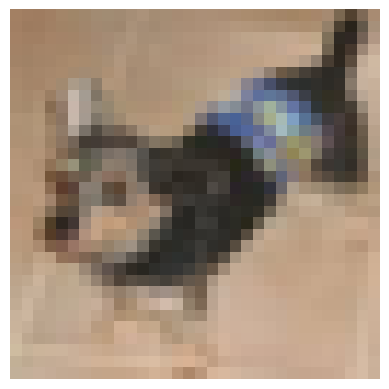

Predicted class: bird
True class: dog



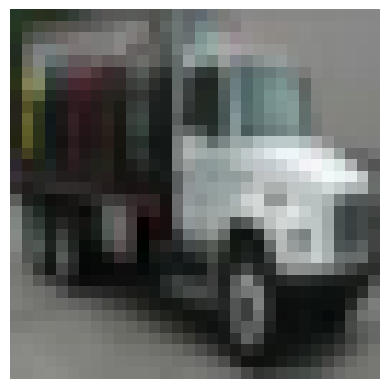

Predicted class: truck
True class: truck



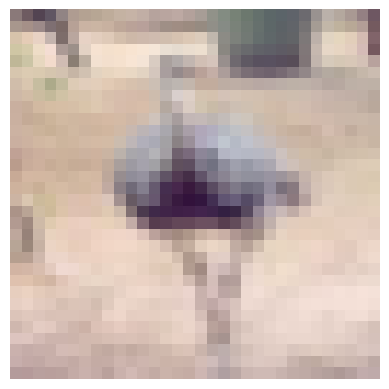

Predicted class: bird
True class: bird



In [11]:
import numpy as np
import matplotlib.pyplot as plt


predictions = model.predict(x_test)

for i in range(3):
    index = np.random.randint(0, len(x_test))

    plt.imshow(x_test[index])
    plt.axis('off')
    plt.show()

    predicted_class = np.argmax(predictions[index])

    true_class = y_test[index][0]

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    print(f'Predicted class: {class_names[predicted_class]}')
    print(f'True class: {class_names[true_class]}')
    print()